# Exploratory analysis of FDA Adverse Event Data 

## Sample Adverse drug event report entry

In [89]:
from pprint import pprint
import json
import os
import matplotlib.pyplot as plt
import csv

basedir = "/Users/balaji/Documents/AZdataanalysis"
sampleADEfile = os.path.join(basedir, "data/sampleADEentry.json")

with open(sampleADEfile,'r') as f:
    data = json.load(f)
    
pprint(data)



{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding '
                        'medical care. While we make every effort to ensure '
                        'that data is accurate, you should assume all results '
                        'are unvalidated. We may limit or otherwise restrict '
                        'your access to the API in line with our Terms of '
                        'Service.',
          'last_updated': '2018-04-27',
          'license': 'https://open.fda.gov/license/',
          'results': {'limit': 1, 'skip': 0, 'total': 8068496},
          'terms': 'https://open.fda.gov/terms/'},
 'results': [{'companynumb': 'HQWYE821915MAR04',
              'fulfillexpeditecriteria': '1',
              'patient': {'drug': [{'drugadministrationroute': '048',
                                    'drugauthorizationnumb': '50621',
                                    'drugcharacterization': '1',
                                    'drugdosagetext': 'ORAL',
  

# Number of records  and versions 

In [2]:
import pandas as pd
import os
basedir = "/Users/balaji/Documents/AZdataanalysis"
outfilename = os.path.join(basedir, "data/datasetfile.csv")
header = ["id", "version", "serious", "seriousnesshospitalization", "country","submitter","patientonsetage",
          "patientonsetageunit","patientsex", "reactions","drugs","drugindication"]


df = pd.read_csv(outfilename, index_col = False, usecols=['id', 'version'], dtype='str' )


In [4]:
# Understand the number of records
ids = df['id']
uniqueids = set(ids.tolist())
print("Total number of records: {0}".format(len(ids)))
print("Total number of unique record ids: {0}".format(len(uniqueids)))
print("Total number of duplicate records: {0}".format(len(ids)-len(uniqueids)))


Total number of records: 8365582
Total number of unique record ids: 8363763
Total number of duplicate records: 1819


In [5]:
# Undestanding the duplicates 
import collections
a = collections.Counter(ids)
b = a.most_common(1820)
print(b)
# Observer the max number of repetition is only 2


# Pandas version slow
#maxversion = df.groupby('id').version.transform(max)
#dfunique = df.loc[df.ver == maxversion]
#print(df.shape)


[('5016815-5', 2), ('4945262-7', 2), ('4943520-3', 2), ('4901214-4', 2), ('4932869-6', 2), ('4911621-1', 2), ('4913596-8', 2), ('4956378-3', 2), ('4947495-2', 2), ('4900694-8', 2), ('4902428-X', 2), ('4890632-9', 2), ('4970282-6', 2), ('4906426-1', 2), ('4951909-1', 2), ('4886545-9', 2), ('4913990-5', 2), ('4903642-X', 2), ('4897391-4', 2), ('4890910-3', 2), ('4876895-4', 2), ('4944134-1', 2), ('4956425-9', 2), ('4881857-7', 2), ('5016743-5', 2), ('4955850-X', 2), ('4970277-2', 2), ('4970280-2', 2), ('4961367-9', 2), ('4951908-X', 2), ('4918540-5', 2), ('4961704-5', 2), ('4906164-5', 2), ('4943984-5', 2), ('4954725-X', 2), ('4890042-4', 2), ('4897586-X', 2), ('4962945-3', 2), ('4975966-1', 2), ('4943987-0', 2), ('4886058-4', 2), ('4970284-X', 2), ('4897204-0', 2), ('4964507-0', 2), ('4906114-1', 2), ('4956258-3', 2), ('4890498-7', 2), ('4914237-6', 2), ('4900345-2', 2), ('4963115-5', 2), ('4967123-X', 2), ('5344907-X', 2), ('5009624-4', 2), ('4931775-0', 2), ('4382205-1', 2), ('4364538

In [ ]:
# Filter out the duplicates to be accurate (later)

## Patient Age distribution

In [190]:
import numpy as np
header = ['id', 'version', 'serious', 'seriousnesshospitalization',
                                                          'country', 'submitter','patientsex', 'patientonsetage',
                                                          'patientonsetageunit']

dtypeval = ['str','str','category','category', 'str','category', 'category', 'str','str']
dtype = dict(zip(header,dtypeval))

In [191]:
# Look at the plot of the number of countries submitting the report

df = pd.read_csv(outfilename, index_col = False, usecols=['id', 'version', 'serious', 'seriousnesshospitalization',
                                                          'country', 'submitter','patientsex', 'patientonsetage',
                                                          'patientonsetageunit'] , dtype=dtype, header=0)



In [194]:
df.describe

<bound method NDFrame.describe of                 id version serious seriousnesshospitalization         country  \
0        4917169-2     NaN       1                        NaN   UNITED STATES   
1        4876311-2     NaN       1                        NaN             NaN   
2        4905470-8     NaN       1                        NaN   UNITED STATES   
3        4906238-9     NaN       1                        NaN  UNITED KINGDOM   
4        4901195-3     NaN       1                        NaN   UNITED STATES   
5        4937082-4     NaN       1                          1   UNITED STATES   
6        4916746-2     NaN       1                          1       GUATEMALA   
7        4912575-4     NaN       1                        NaN   UNITED STATES   
8        5012524-7     NaN       2                        NaN   UNITED STATES   
9        5025605-9     NaN       1                        NaN   UNITED STATES   
10       4883495-9     NaN       1                        NaN         GERMA

In [245]:
# Look at the patient age distribution
df1 = df[[ 'patientonsetage', 'patientonsetageunit' ]]
df2 = df1.dropna(how='any')
age = df2.patientonsetage[df2.patientonsetageunit=='801']
age = age.astype(np.float).as_matrix()

# There are some very high age values
age = age[age < 125]


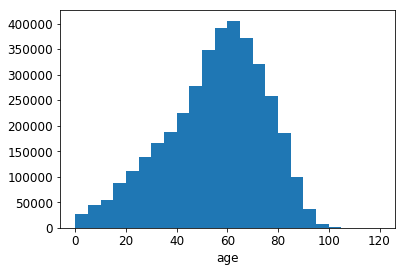

In [255]:
plt.hist(age, bins=np.arange(0,125,5))
plt.xlabel('age')
plt.show()

# Submitter distribution

In [262]:
submitter = df.submitter.cat.rename_categories(['Physician','Pharmacist','other health professional',
                                                'Lawyer','Consumer or non-health professional'])
print(submitter.value_counts())

Consumer or non-health professional    3812411
Physician                              1931857
other health professional              1440121
Pharmacist                              504722
Lawyer                                  144312
dtype: int64


##  Serious Events distribution

In [21]:
b = df.serious.cat.rename_categories(['Serious', 'Not serious'])
b.value_counts()

Serious        4929902
Not serious    3435680
dtype: int64

## Serioushospitalization variable distribution

In [22]:
df.seriousnesshospitalization.value_counts()

1    2019180
Name: seriousnesshospitalization, dtype: int64

In [23]:
pd.crosstab(df.serious, df.seriousnesshospitalization)

seriousnesshospitalization,1
serious,
1,2019180
2,0


Roughly only about 40% of the serious patients were hospitalized or data reported for a smaller number only

# Distribution of males and females in the report

In [24]:
aa = df.patientsex.cat.rename_categories(['unknown','Male','Female'])
aa.value_counts()



Female     4658868
Male       2928601
unknown      92185
dtype: int64

We see many more female patients in the dataset

# Countries submitting reports and the number of reports submitted

In [84]:
countries = df.country.value_counts()
print(countries[0:50])

US                       3814773
UNITED STATES            1752597
COUNTRY NOT SPECIFIED     416024
GB                        210347
JP                        162326
FR                        125463
CA                        120653
UNITED KINGDOM            107031
JAPAN                     103006
DE                        102384
FRANCE                     87369
IT                         78376
GERMANY                    72478
BR                         57640
CANADA                     48438
AU                         40180
NL                         36462
ES                         34206
CN                         33693
BRAZIL                     33151
AUSTRALIA                  26279
ITALY                      23216
IN                         20880
SPAIN                      20048
CH                         17192
SWITZERLAND                16697
CO                         16588
SE                         16535
TR                         16354
NETHERLANDS                14544
DK        

In [139]:
countries.shape

(425,)

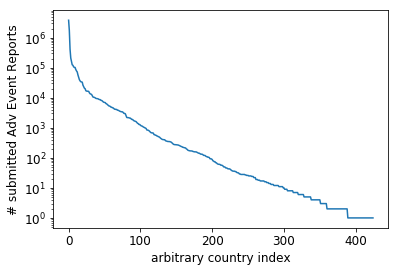

In [140]:
# Get the top N countries who submitted reports to FDA
import matplotlib
topN = slice(0,425)
matplotlib.rcParams.update({'font.size': 12})
x = countries.index.tolist()
xval = np.arange(len(x))
y = countries.values

#plt.xticks(xval[topN],x[topN], rotation = 90)
plt.yscale('log')
plt.plot(xval[topN], y[topN]);
plt.xlabel('arbitrary country index')
plt.ylabel('# submitted Adv Event Reports')
plt.show()

We need to normalize the countries (both expanded version and shorter versions used). The total number is less than 425.

## Look at the drugs that co-occur together

In [116]:
# Create a drug-drug network
import itertools
import collections

drugcounts = collections.Counter()
edges = collections.Counter()

with open(outfilename,'r') as f:
    f_csv = csv.DictReader(f)
    i = 0
    for row in f_csv:
        drugs = row['drugs'].split(';')
        #print(drugs,"***")
        
        for d in drugs:
            drugcounts[d] += 1
        
        for d in itertools.combinations(drugs,2):
            drugpair = tuple(sorted(d))
            #print(drugpair)
            edges[drugpair] += 1
        
        i+=1
        if (i % 1000000 == 0):
            print(i)
        
        #if i >20:
        #    break

print("completed reading files")


1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000


In [117]:
# Commonly occuring drugs in adverse event reports
drugcounts.most_common(50)

[('', 1166608),
 ('ADALIMUMAB', 328820),
 ('ASPIRIN 325 MG', 257959),
 ('FUROSEMIDE', 187015),
 ('METHOTREXATE', 168191),
 ('LISINOPRIL', 163236),
 ('PREDNISONE', 159757),
 ('INTERFERON BETA-1A', 152993),
 ('SIMVASTATIN', 152109),
 ('GABAPENTIN', 146694),
 ('ATORVASTATIN CALCIUM', 146349),
 ('OMEPRAZOLE', 140373),
 ('ERGOCALCIFEROL', 138583),
 ('NATALIZUMAB', 138195),
 ('LENALIDOMIDE', 137378),
 ('PREGABALIN', 131647),
 ('METFORMIN', 126726),
 ('LEVONORGESTREL', 121363),
 ('LEVOTHYROXINE SODIUM', 114466),
 ('FOLIC ACID', 110672),
 ('METOPROLOL', 106945),
 ('ALPRAZOLAM', 105783),
 ('ESOMEPRAZOLE SODIUM', 104504),
 ('INSULIN GLARGINE', 101112),
 ('RIVAROXABAN', 98893),
 ('ROSIGLITAZONE MALEATE', 96137),
 ('INFLIXIMAB', 95069),
 ('WARFARIN SODIUM', 94587),
 ('DULOXETINE HYDROCHLORIDE', 94481),
 ('DENOSUMAB', 91434),
 ('ROSUVASTATIN CALCIUM', 90389),
 ('TIOTROPIUM BROMIDE', 90211),
 ('AMLODIPINE', 89695),
 ('TERIPARATIDE', 89078),
 ('DEXAMETHASONE 1.5 MG', 88685),
 ('ATENOLOL', 86651),
 ('

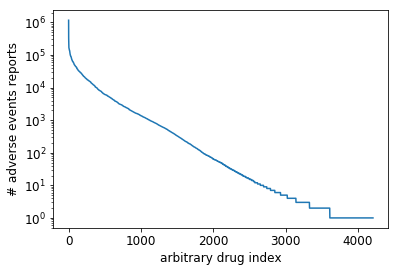

In [129]:
drugcountval = np.array(list(drugcounts.values()))
plt.semilogy(sorted(drugcountval, reverse=True))
plt.xlabel('arbitrary drug index')
plt.ylabel('# adverse events reports')
plt.show()

In [112]:
edges.most_common(50)

[(('FOLIC ACID', 'METHOTREXATE'), 45203),
 (('ADALIMUMAB', 'METHOTREXATE'), 42227),
 (('ASPIRIN 325 MG', 'FUROSEMIDE'), 36376),
 (('ASPIRIN 325 MG', 'SIMVASTATIN'), 34854),
 (('PEGINTERFERON ALFA-2A', 'RIBAVIRIN'), 33415),
 (('ASPIRIN 325 MG', 'LISINOPRIL'), 33282),
 (('DEXAMETHASONE 1.5 MG', 'LENALIDOMIDE'), 32484),
 (('ASPIRIN 325 MG', 'CLOPIDOGREL BISULFATE'), 29932),
 (('ASPIRIN 325 MG', 'ATORVASTATIN CALCIUM'), 26373),
 (('METHOTREXATE', 'PREDNISONE'), 25780),
 (('ADALIMUMAB', 'FOLIC ACID'), 25418),
 (('ADALIMUMAB', 'PREDNISONE'), 25290),
 (('ASPIRIN 325 MG', 'METOPROLOL'), 25171),
 (('ERGOCALCIFEROL', 'OCTINOXATE'), 24762),
 (('FUROSEMIDE', 'SPIRONOLACTONE'), 24581),
 (('INSULIN GLARGINE', 'INSULIN LISPRO'), 24215),
 (('FUROSEMIDE', 'LISINOPRIL'), 23647),
 (('ASPIRIN 325 MG', 'ERGOCALCIFEROL'), 23302),
 (('FUROSEMIDE', 'POTASSIUM CHLORIDE'), 23026),
 (('LISINOPRIL', 'SIMVASTATIN'), 21977),
 (('INTERFERON BETA-1A', 'NATALIZUMAB'), 21693),
 (('ASPIRIN 325 MG', 'OMEPRAZOLE'), 20399)

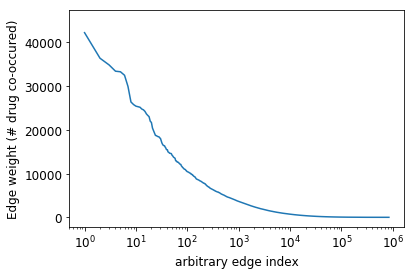

In [142]:
# Plotting the edge weights
edgewtval = np.array(list(edges.values()))
plt.semilogx(sorted(edgewtval, reverse=True))
plt.xlabel('arbitrary edge index')
plt.ylabel('Edge weight (# drug co-occured)')
plt.show()


In [143]:
## Possibly other ideas here based on network algorithms

# Carry out Adverse reaction analysis 

In [268]:
# Analysis to see what indications are connected with various adverse reactions
import itertools
import collections

indicationcounts = collections.Counter()
reactioncounts = collections.Counter()
reactionindicationcounts = collections.Counter()


with open(outfilename,'r') as f:
    f_csv = csv.DictReader(f)
    i = 0
    for row in f_csv:
        reactions = row['reactions'].split(';')
        indications = row['drugindication'].split(';')
        
                
        for r in reactions:
            reactioncounts[r] += 1
            
        for indi in indications:
            indicationcounts[indi] += 1
            
        #print(reactions, indications)
        for ri in itertools.product(reactions, indications):
            rxindpair = tuple(ri)
            #print(rxindpair)
            reactionindicationcounts[rxindpair] += 1
        
        i+=1
        if (i % 1000000 == 0):
            print(i)
        
        #if i >20:
        #    break

print("completed reading files")


1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
completed reading files


In [270]:
reactioncounts.most_common(50)

[('Drug ineffective', 357982),
 ('Death', 240111),
 ('Nausea', 222305),
 ('Fatigue', 221594),
 ('Headache', 186778),
 ('Diarrhoea', 172866),
 ('Off label use', 170680),
 ('Pain', 159260),
 ('Dyspnoea', 158679),
 ('Malaise', 148203),
 ('Dizziness', 144623),
 ('NAUSEA', 131289),
 ('Vomiting', 128313),
 ('DRUG INEFFECTIVE', 124279),
 ('Drug dose omission', 117024),
 ('Arthralgia', 111782),
 ('Rash', 108269),
 ('Asthenia', 107747),
 ('Pain in extremity', 96262),
 ('Fall', 96074),
 ('Pyrexia', 92229),
 ('DEATH', 91841),
 ('HEADACHE', 91737),
 ('Injection site pain', 90434),
 ('DYSPNOEA', 90239),
 ('Pneumonia', 88601),
 ('DIZZINESS', 87220),
 ('FATIGUE', 86206),
 ('Pruritus', 84556),
 ('VOMITING', 83908),
 ('Insomnia', 82702),
 ('Anxiety', 77932),
 ('Feeling abnormal', 77479),
 ('PAIN', 76877),
 ('DIARRHOEA', 75977),
 ('Weight decreased', 75129),
 ('Cough', 74287),
 ('Back pain', 70745),
 ('Depression', 68462),
 ('Product use issue', 66312),
 ('Decreased appetite', 65406),
 ('Product quality

In [271]:
indicationcounts.most_common(50)

[('PRODUCT USED FOR UNKNOWN INDICATION', 1587907),
 ('', 1120016),
 ('RHEUMATOID ARTHRITIS', 440309),
 ('MULTIPLE SCLEROSIS', 390105),
 ('HYPERTENSION', 274506),
 ('DIABETES MELLITUS', 198826),
 ('DRUG USE FOR UNKNOWN INDICATION', 184534),
 ('PAIN', 177650),
 ('DEPRESSION', 175471),
 ('PSORIASIS', 165889),
 ('CONTRACEPTION', 142899),
 ('TYPE 2 DIABETES MELLITUS', 142187),
 ('OSTEOPOROSIS', 135779),
 ('PLASMA CELL MYELOMA', 134847),
 ('PERITONEAL DIALYSIS', 113473),
 ('ATRIAL FIBRILLATION', 112402),
 ('PSORIATIC ARTHROPATHY', 111331),
 ('CROHN^S DISEASE', 97331),
 ('ASTHMA', 91864),
 ('BLOOD CHOLESTEROL INCREASED', 88063),
 ('PROPHYLAXIS', 88021),
 ('HEPATITIS C', 84424),
 ('ANXIETY', 83454),
 ('PULMONARY ARTERIAL HYPERTENSION', 80821),
 ('CHRONIC OBSTRUCTIVE PULMONARY DISEASE', 79637),
 ('GASTROOESOPHAGEAL REFLUX DISEASE', 73501),
 ('INSOMNIA', 60696),
 ('BREAST CANCER', 59531),
 ('SMOKING CESSATION THERAPY', 58777),
 ('CEREBROVASCULAR ACCIDENT PROPHYLAXIS', 54615),
 ('HYPOTHYROIDISM',

In [272]:
reactionindicationcounts.most_common(50)

[(('Drug ineffective', 'PRODUCT USED FOR UNKNOWN INDICATION'), 86226),
 (('Death', 'PRODUCT USED FOR UNKNOWN INDICATION'), 71875),
 (('Nausea', 'PRODUCT USED FOR UNKNOWN INDICATION'), 56333),
 (('Fatigue', 'PRODUCT USED FOR UNKNOWN INDICATION'), 55977),
 (('Diarrhoea', 'PRODUCT USED FOR UNKNOWN INDICATION'), 47772),
 (('Headache', 'PRODUCT USED FOR UNKNOWN INDICATION'), 47494),
 (('Dyspnoea', 'PRODUCT USED FOR UNKNOWN INDICATION'), 41866),
 (('Malaise', 'PRODUCT USED FOR UNKNOWN INDICATION'), 40363),
 (('Dizziness', 'PRODUCT USED FOR UNKNOWN INDICATION'), 39575),
 (('Drug ineffective', ''), 37973),
 (('Pain', 'PRODUCT USED FOR UNKNOWN INDICATION'), 34080),
 (('Off label use', 'PRODUCT USED FOR UNKNOWN INDICATION'), 33988),
 (('Drug dose omission', 'PRODUCT USED FOR UNKNOWN INDICATION'), 32836),
 (('Vomiting', 'PRODUCT USED FOR UNKNOWN INDICATION'), 32541),
 (('Drug hypersensitivity', ''), 31048),
 (('Drug ineffective', 'RHEUMATOID ARTHRITIS'), 30669),
 (('Rash', 'PRODUCT USED FOR UNKNO

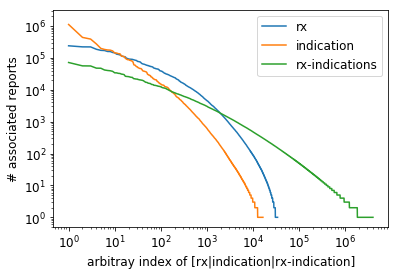

In [282]:
rxval = np.array(list(reactioncounts.values()))
indval = np.array(list(indicationcounts.values()))
rxindval = np.array(list(reactionindicationcounts.values()))

#plt.subplot(3,1,1)
plt.loglog(sorted(rxval, reverse=True))


#plt.subplot(3,1,2)
plt.loglog(sorted(indval, reverse=True))

#plt.subplot(3,1,3)
plt.loglog(sorted(rxindval, reverse=True))
plt.xlabel('arbitray index of [rx|indication|rx-indication]')
plt.ylabel("# associated reports")
plt.legend(['rx','indication','rx-indications'])
plt.show()